In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('diabetes1.csv')

In [3]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [4]:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(data.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [6]:
#statistical
print(data.describe().T)

                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

In [7]:
# data is corrupted as it shows that glucose, BP, SkinThickness etc cannot be zero

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [9]:
# checking missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
# to find count of diabetic and non-diabetib
print(data.Outcome.unique())

[1 0]


In [11]:
print(data.Outcome.value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


## Exploratory data Analysis

### Univariate

* hist plot to check distribution of data
* count plot to check data is balanced or not

<Axes: xlabel='Outcome', ylabel='count'>

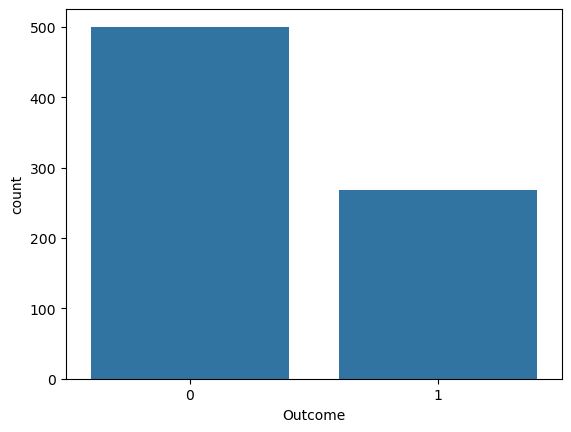

In [12]:
sns.countplot(x=data.Outcome)
# count of diabetic and non diabetic

* data is imbalanced as more records of non diabetic compared of diabetic

<Axes: xlabel='Pregnancies', ylabel='count'>

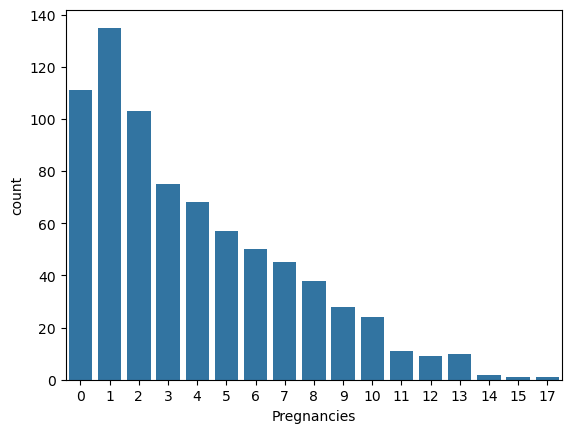

In [13]:
sns.countplot(x=data.Pregnancies)

In [14]:
data.Pregnancies.value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

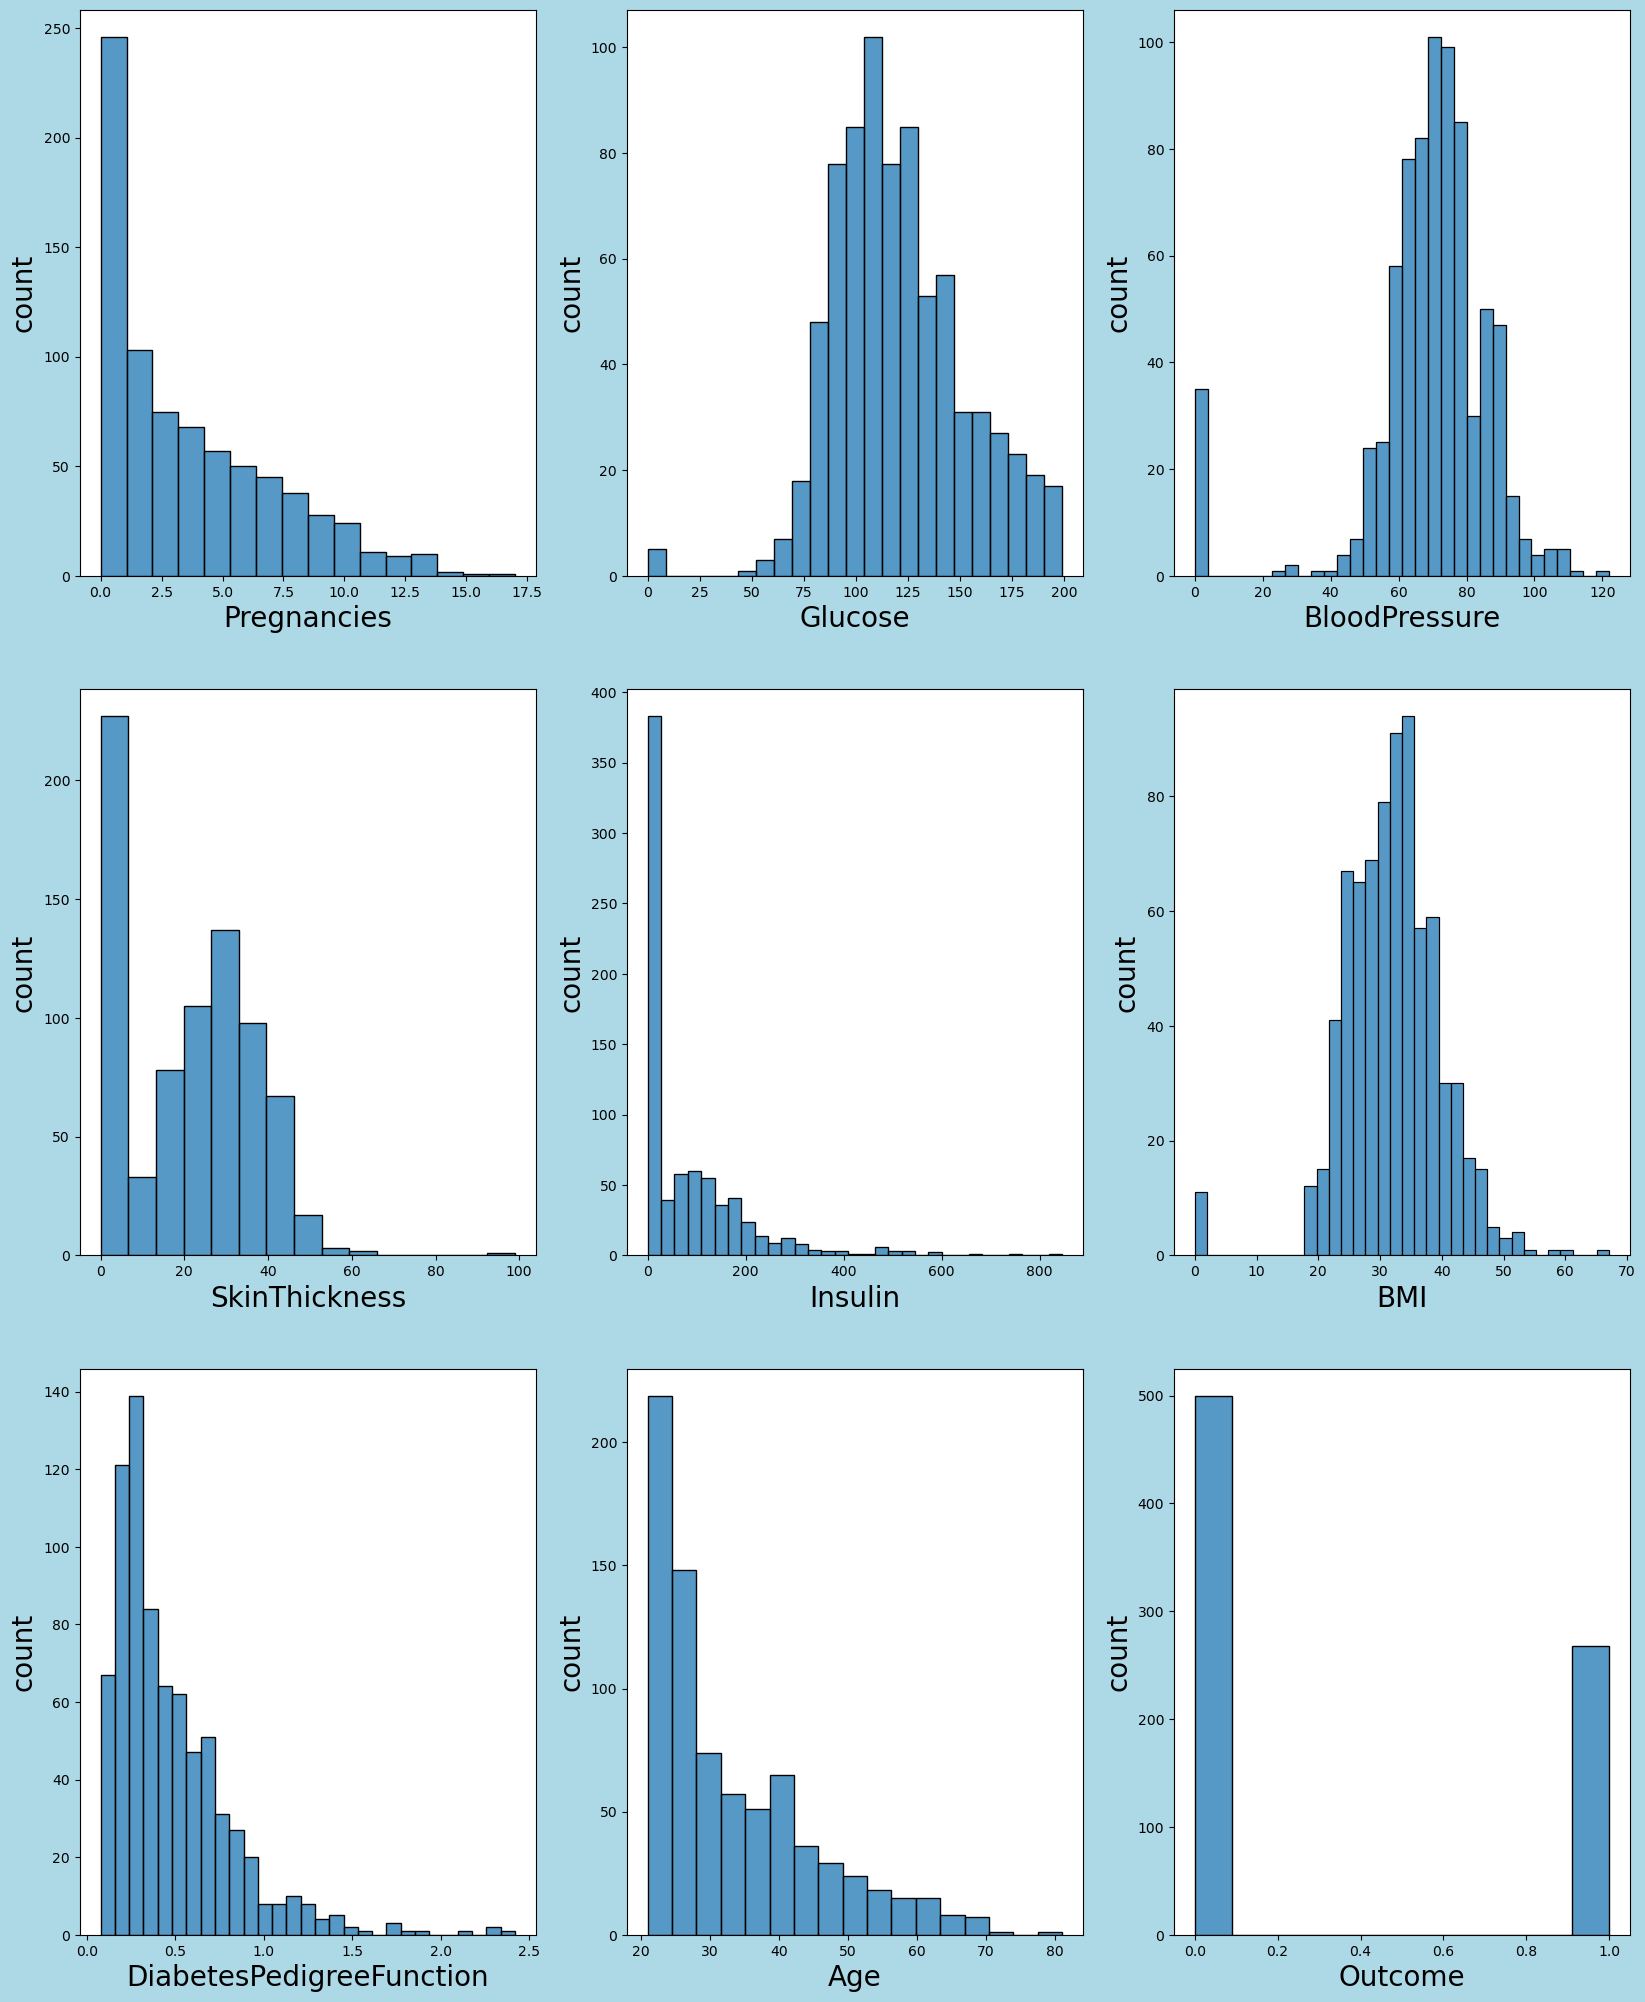

In [15]:
plt.figure(figsize=(20,25),facecolor='lightblue')
plotnumber = 1
for column in data:
    if plotnumber <= 9: # 9 columns
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column]) # for each column
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

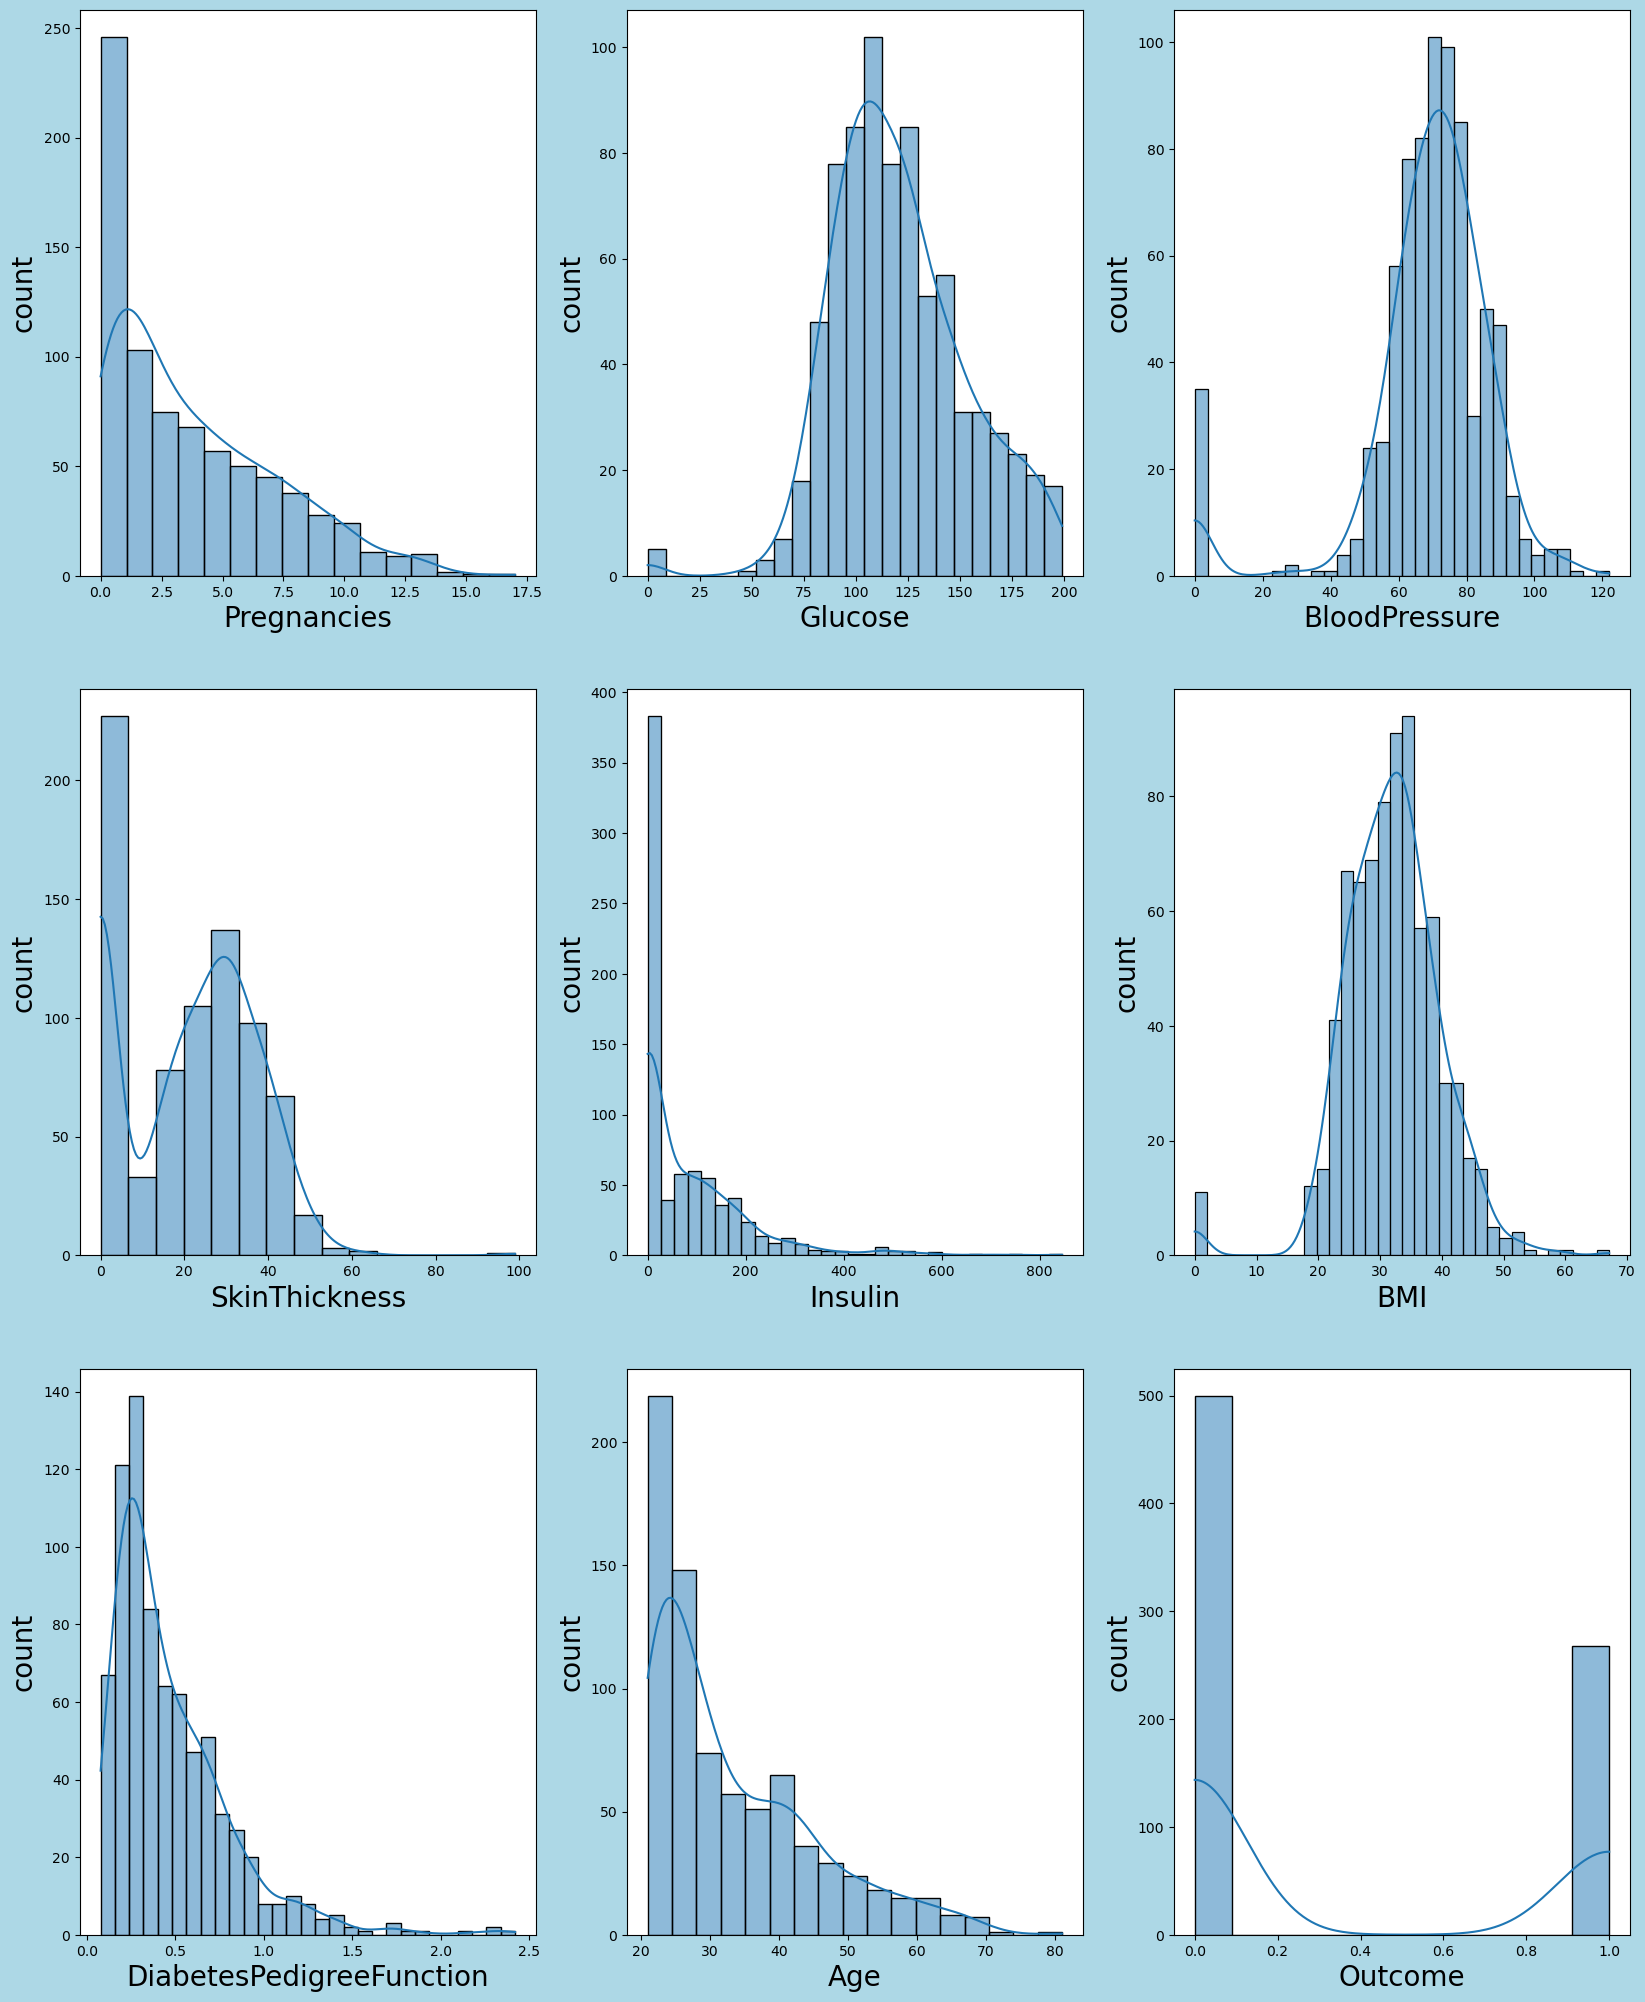

In [16]:
plt.figure(figsize=(20,25),facecolor='lightblue')
plotnumber = 1
for column in data:
    if plotnumber <= 9: # 9 columns
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(data[column],kde=True) # for each column
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout

* glucose, BP, BMI representing normal distribution

### Bivariate

In [17]:
# Analyzing how preganancies impact the patient with diabetes.

<Axes: xlabel='Pregnancies', ylabel='count'>

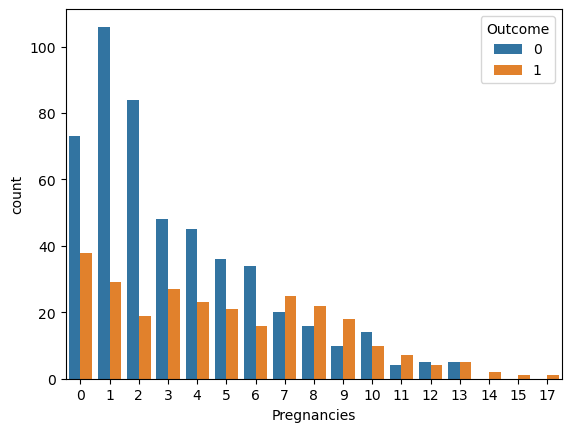

In [18]:
sns.countplot(x='Pregnancies',data=data, hue='Outcome')

* if a patient is pregnent, probability of being diabetes if high


In [19]:
# Aanlyzing the relationship between diabetes and Glucose

<Axes: xlabel='Glucose', ylabel='Count'>

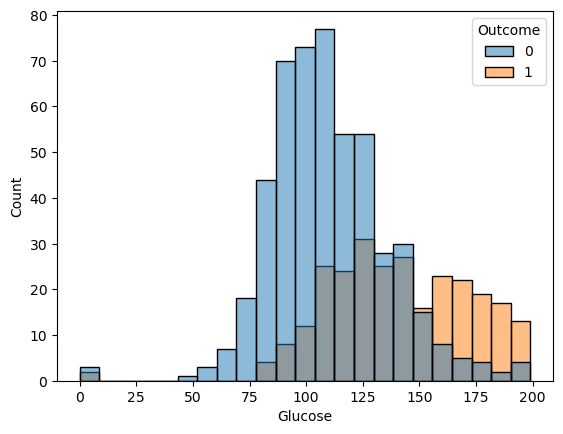

In [20]:
sns.histplot(data=data, x='Glucose', hue='Outcome')

* if glucose level is less the chance of being diabetic is also less
* if glucose level is high the chance of being diabetic is also high
* A person having glucose range between 100 to 150 is equaly at risk and no risk
* A person having glucose range above 150 is has higher chance of getting diabetes
* A person having glucose range bolow 100 is has lesser chance of getting diabetes



In [21]:
# Analyze Glucose with blood pressure

<Axes: xlabel='BloodPressure', ylabel='Count'>

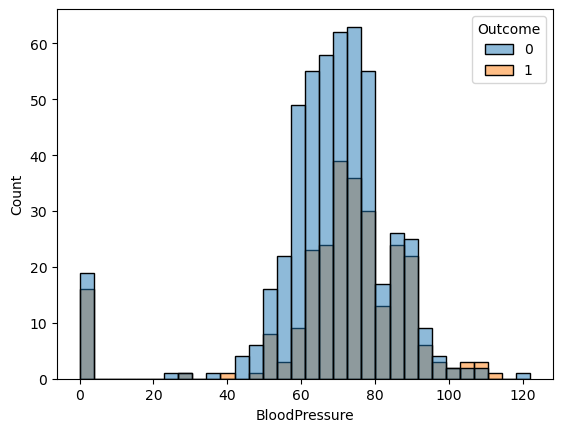

In [22]:
sns.histplot(data=data, x='BloodPressure', hue='Outcome')

* A person having BP range between 50 to 100 is equaly at risk and no risk
* A person having BP range above 100 and below 50 has lesser chance of getting diabetes


<Axes: xlabel='Insulin', ylabel='Count'>

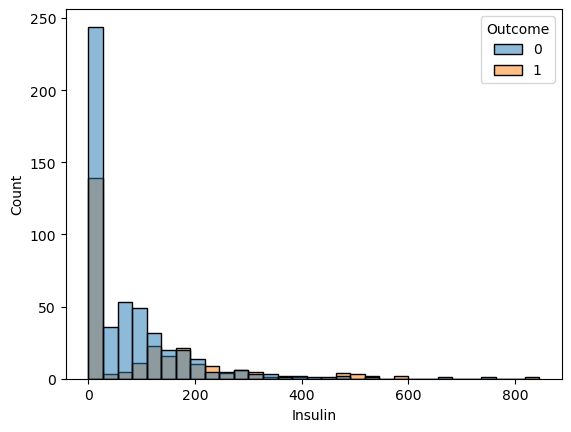

In [25]:
# Analyzing Insulin with target
sns.histplot(x='Insulin',hue='Outcome',data=data)

* the chance of being diabetic is high if insulin level is high
* The chance of being diabetic is less if insulin level is less

<Axes: xlabel='Age', ylabel='Count'>

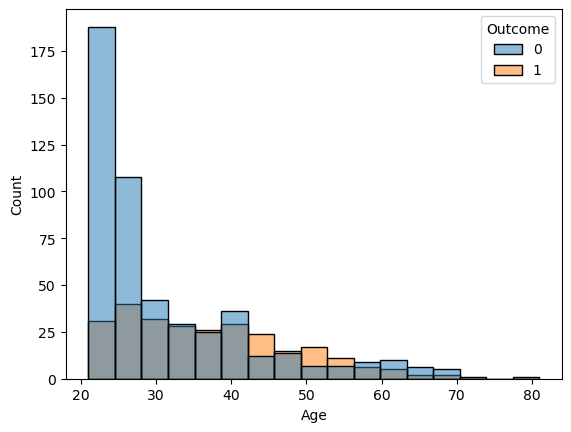

In [26]:
# Analyzing age with outcome
sns.histplot(x='Age',hue='Outcome',data=data)

* the chance of being diabetic is high if age is more
* The chance of being diabetic is less if age is less

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

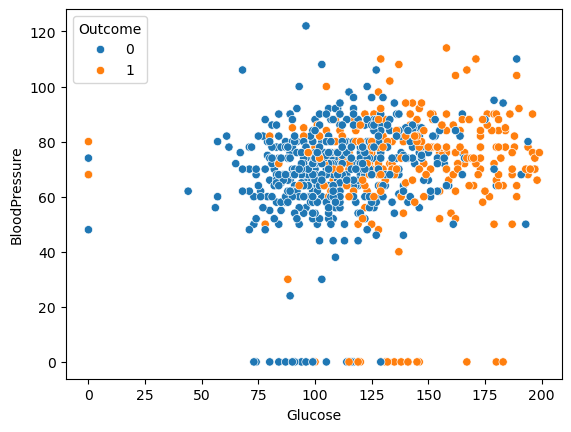

In [27]:
#Analyse Glucose and BP
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome',data=data)

* The patient with less glucose level and BP will have less chance of being diabetic
* The patient with high glucose level and BP will have high chance of being diabetic

## Data Preprocessing and Feature Engineering.

In [29]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
# no missing data so no need to handel it

#### Handle corrupted data

In [31]:
# Glucose, BP, insulin, bmi, skinthickness cannot have value in zero
# Replace all zero values with median

In [32]:
data.Glucose.replace(0,np.median(data.Glucose),inplace=True)
# replace 0 value from glucose column with median of glucose

In [33]:
data.BloodPressure.replace(0,np.median(data.BloodPressure),inplace=True)

In [34]:
data.SkinThickness.replace(0,np.median(data.SkinThickness),inplace=True)

In [35]:
data.Insulin.replace(0,np.median(data.Insulin),inplace=True)


In [36]:
data.BMI.replace(0,np.median(data.BMI),inplace=True)

In [37]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Check for outliers

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

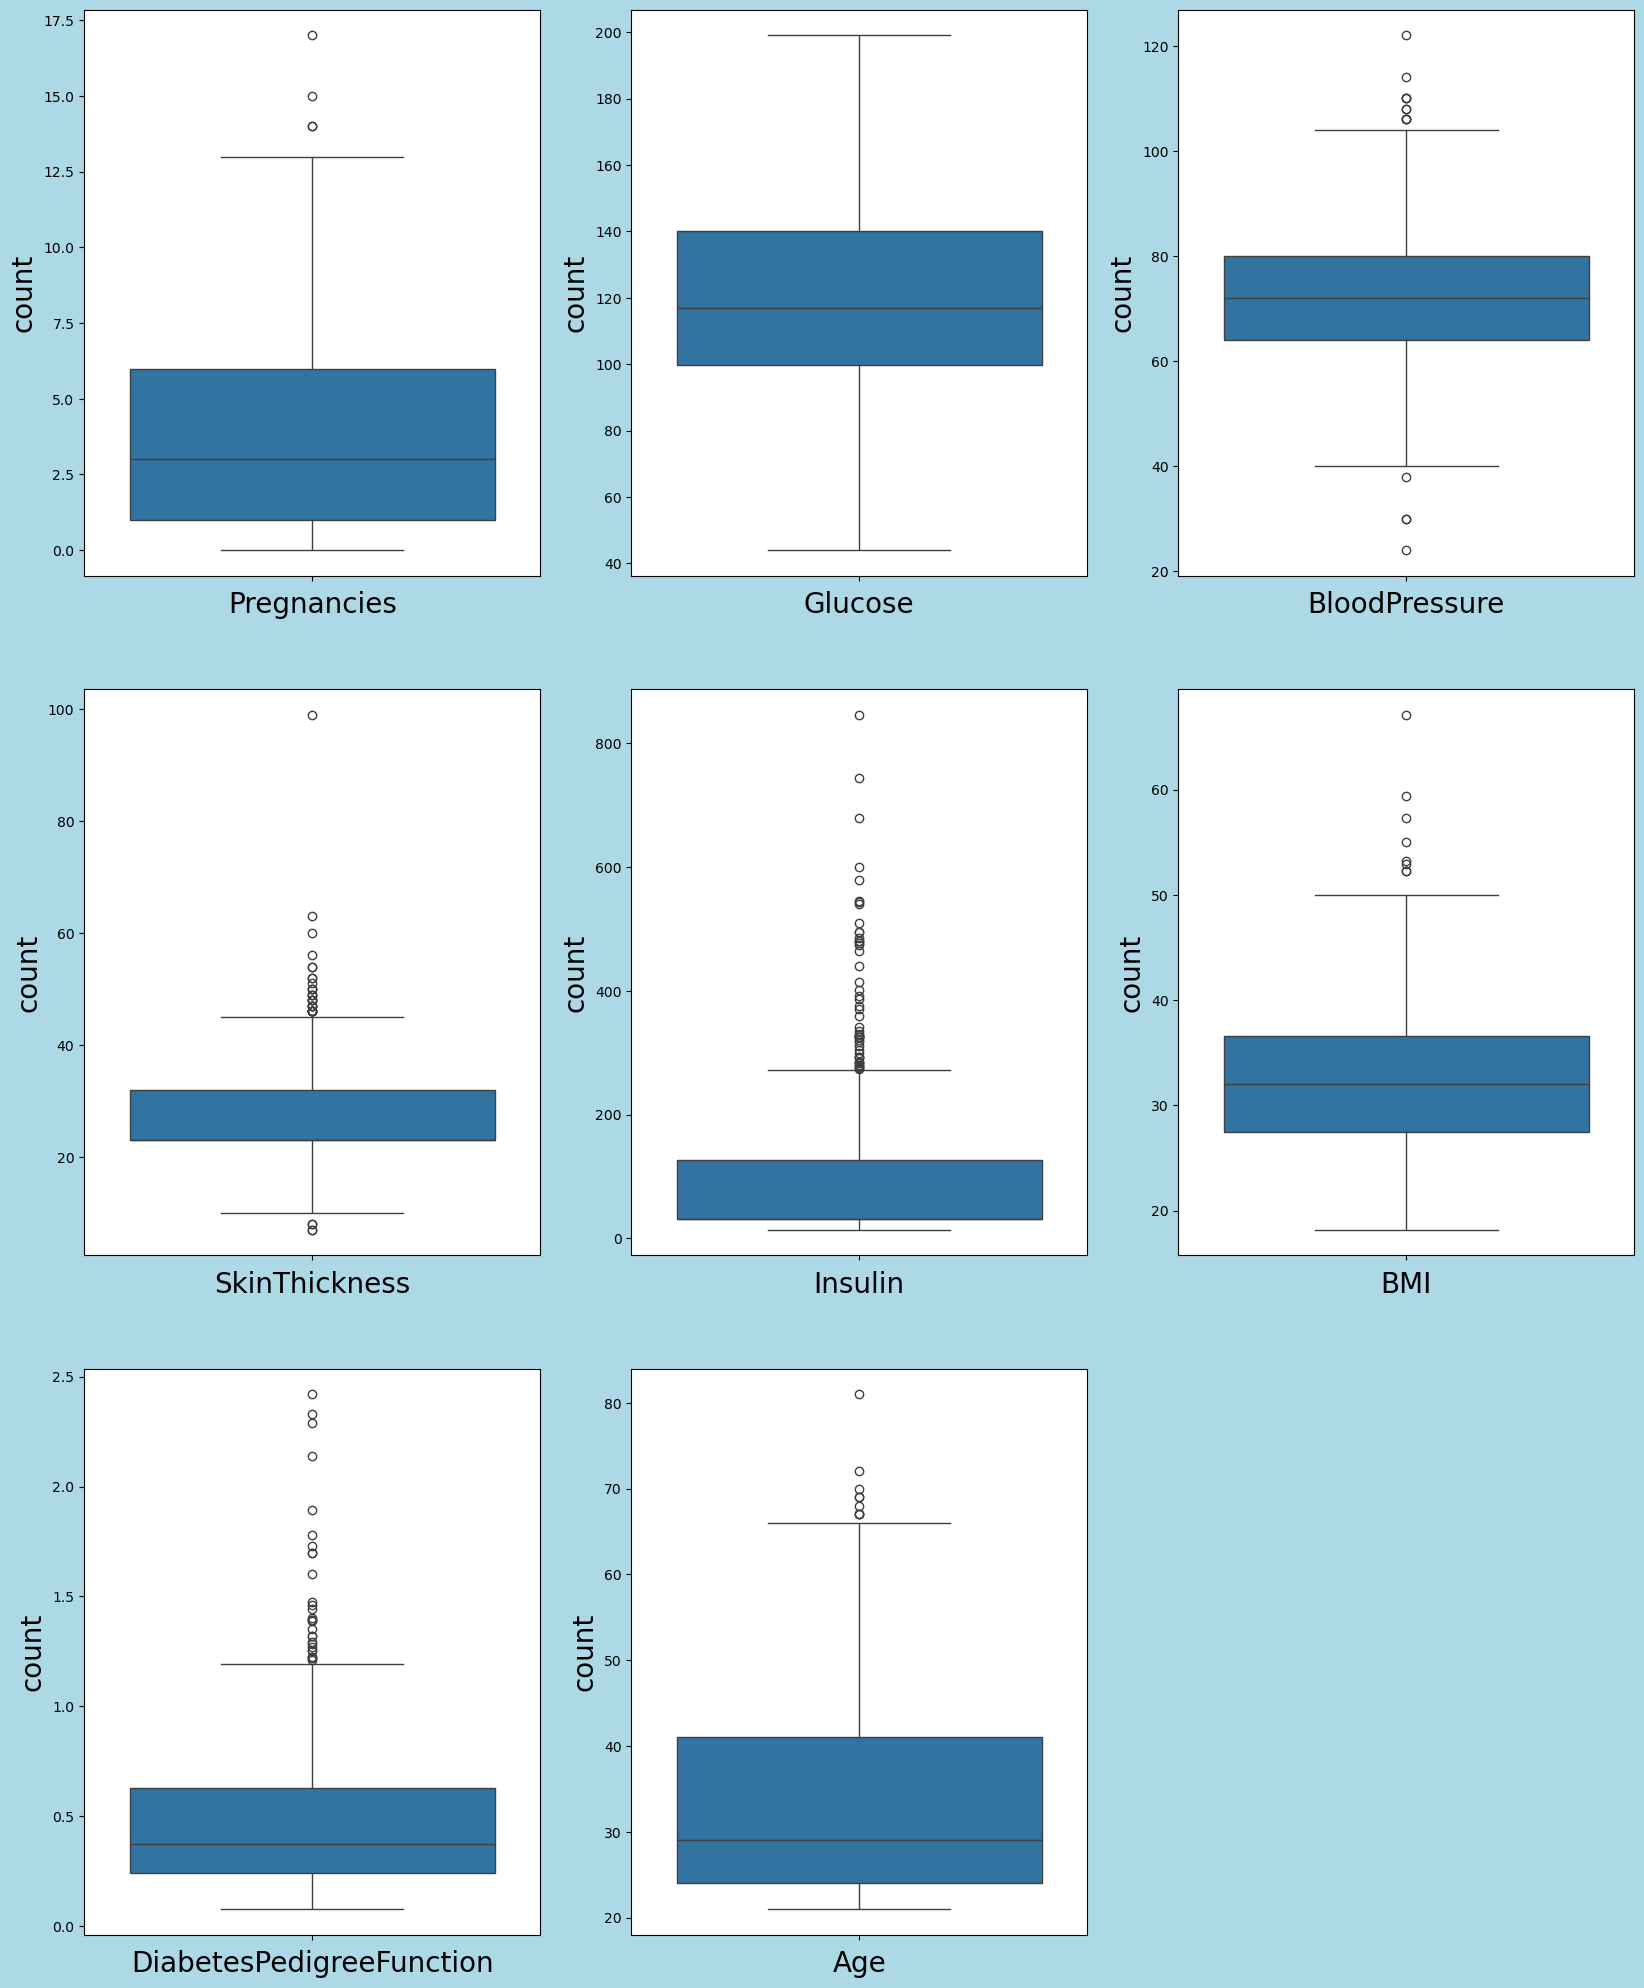

In [38]:
plt.figure(figsize=(20,25),facecolor='lightblue')
plotnumber = 1
for column in data.drop('Outcome',axis=1): # as box plot is only for continous data and outcome has discrete data (0 and 1) hence drop it
    if plotnumber <= 9: # 9 columns
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column]) # for each column
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout

#### Scaling data (Normalization or Standardization)

In [39]:
# minmax scaler 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [40]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [41]:
# apply minmax scaler on continous data
# convert to scale from 0 to 1
df=['Pregnancies','Outcome']
data1 = sc.fit_transform(data.drop(df,axis=1)) # dropping discrete value column

In [42]:
data1

array([[0.67096774, 0.48979592, 0.30434783, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.26451613, 0.42857143, 0.23913043, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.89677419, 0.40816327, 0.17391304, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.49677419, 0.48979592, 0.17391304, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.52903226, 0.36734694, 0.17391304, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.31612903, 0.46938776, 0.26086957, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [52]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
# convert array into dataframe
data2 = pd.DataFrame(data1, columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
data2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [ ]:
# data.sort_values('Age',axis=0)
# variation in age is huge hence it is continous

In [53]:
con_data=data[['Pregnancies','Outcome']]
con_data

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [54]:
type(data1)

numpy.ndarray

In [55]:
nD=pd.DataFrame(data1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [56]:
nD

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [58]:
final_df=pd.concat([nD,con_data],axis=1)
final_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Outcome
0,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333,6,1
1,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667,1,0
2,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333,8,1
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,1,0
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,0,1
...,...,...,...,...,...,...,...,...,...
763,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,10,0
764,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000,2,0
765,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,5,0
766,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333,1,1
